## Bike Sharing Assignment Multiple Linear Regression 

In [66]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Step1: Importing Libraries

In [127]:
import pandas as pd
import numpy as np

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Step 2: Reading and Understanding Dataset

In [159]:
# Importing days.csv
day_df = pd.read_csv('day.csv')

In [160]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [161]:
day_df.size

11680

In [162]:
day_df.ndim

2

In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [73]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [74]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [75]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Step 3: Data Cleaning and Pre-Processing

#### Drop columns that are not useful for analysis

In [163]:
#atemp is derivied from temp and have high correlation so drop atemp too.

day_df.drop(['casual','registered','atemp','dteday','instant'], axis=1, inplace=True)

#### In data information we saw there are no null values so we do not need to handle Missing values.

#### Handle outliers

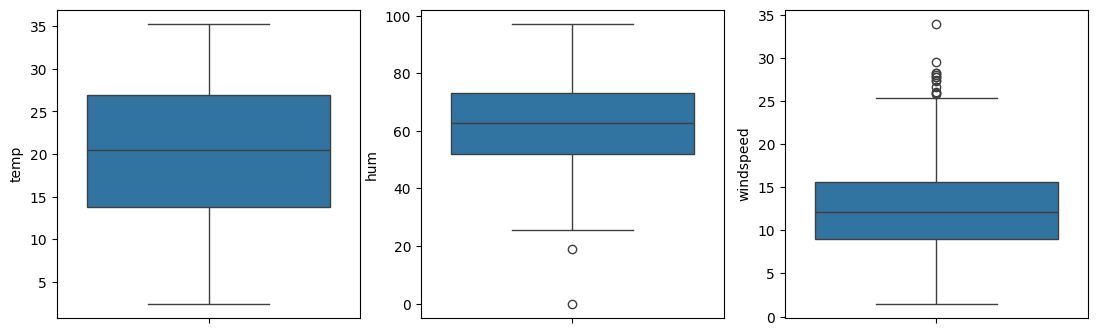

In [164]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=day_df)
    i+=1

#### By plotiing above independent continous variable we didn't found any major outlier. so we are good to go with dataset. 

### Step 4: EDA

<Axes: >

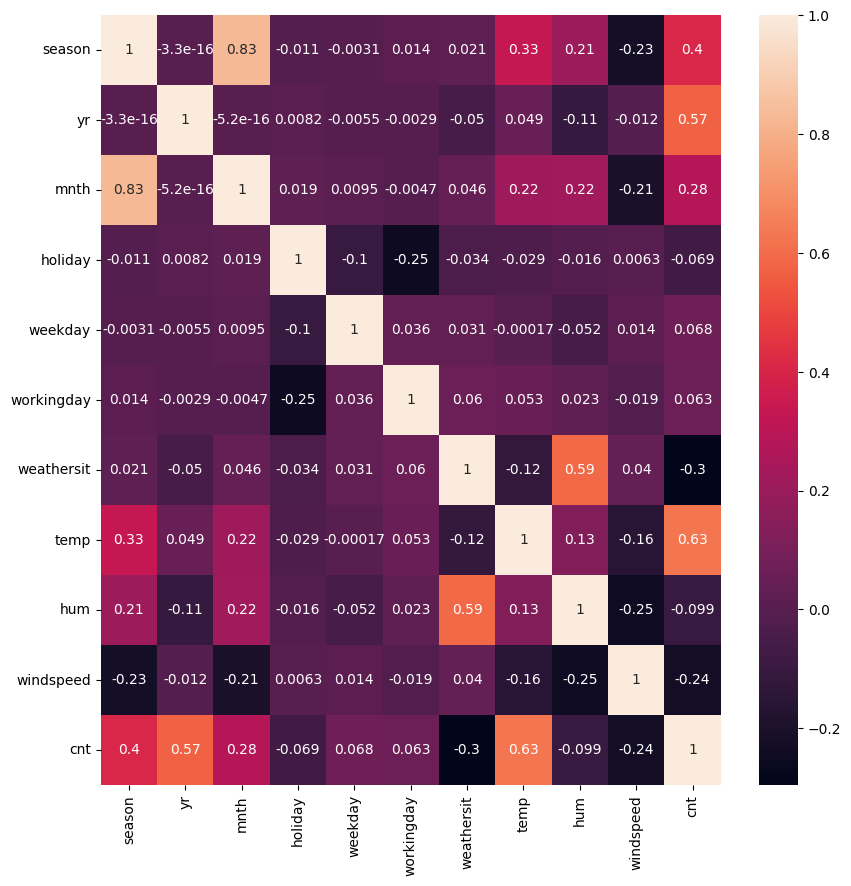

In [165]:
# correlation between all columns
plt.subplots(figsize=(10,10))
sns.heatmap(day_df.corr(),annot=True)

#### Analysing Categorical Variabels with target variables

<Axes: xlabel='season', ylabel='cnt'>

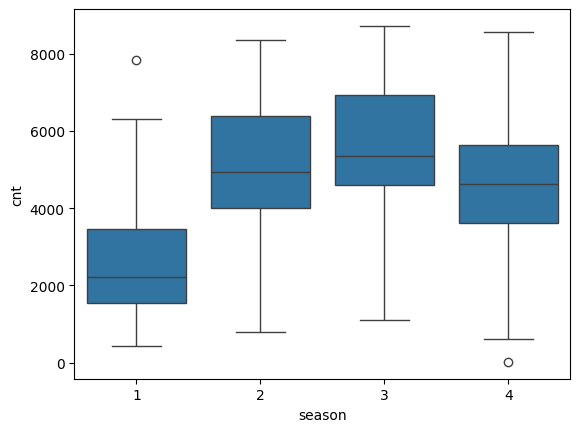

In [79]:
sns.boxplot(x = 'season', y = 'cnt', data = day_df)

<Axes: xlabel='yr', ylabel='cnt'>

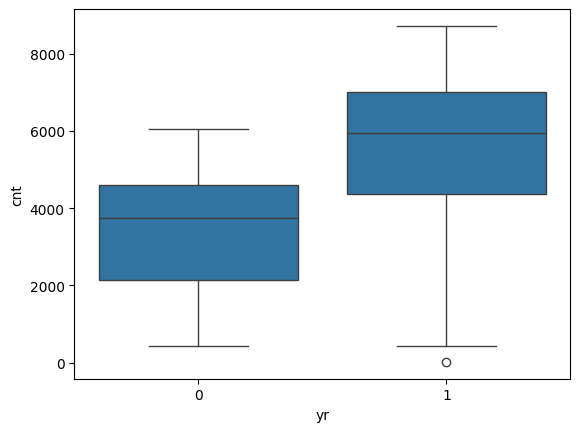

In [80]:
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)

<Axes: xlabel='weekday', ylabel='cnt'>

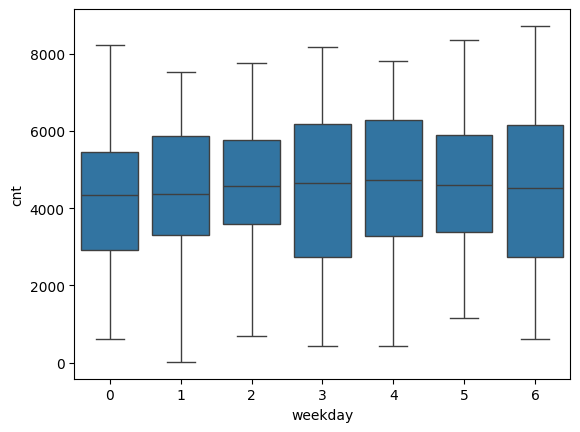

In [81]:
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)

<Axes: xlabel='workingday', ylabel='cnt'>

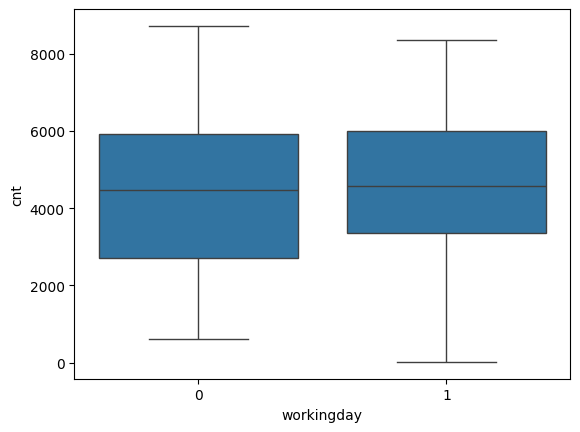

In [82]:
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)

#### Convert season, month, weekday and weathersit to categorical types

In [168]:
day_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [169]:
day_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day_df.mnth = day_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

day_df.weekday = day_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


In [170]:
day_df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [171]:
day_df.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [172]:
day_df.mnth.value_counts()

mnth
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: count, dtype: int64

In [173]:
day_df.weekday.value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

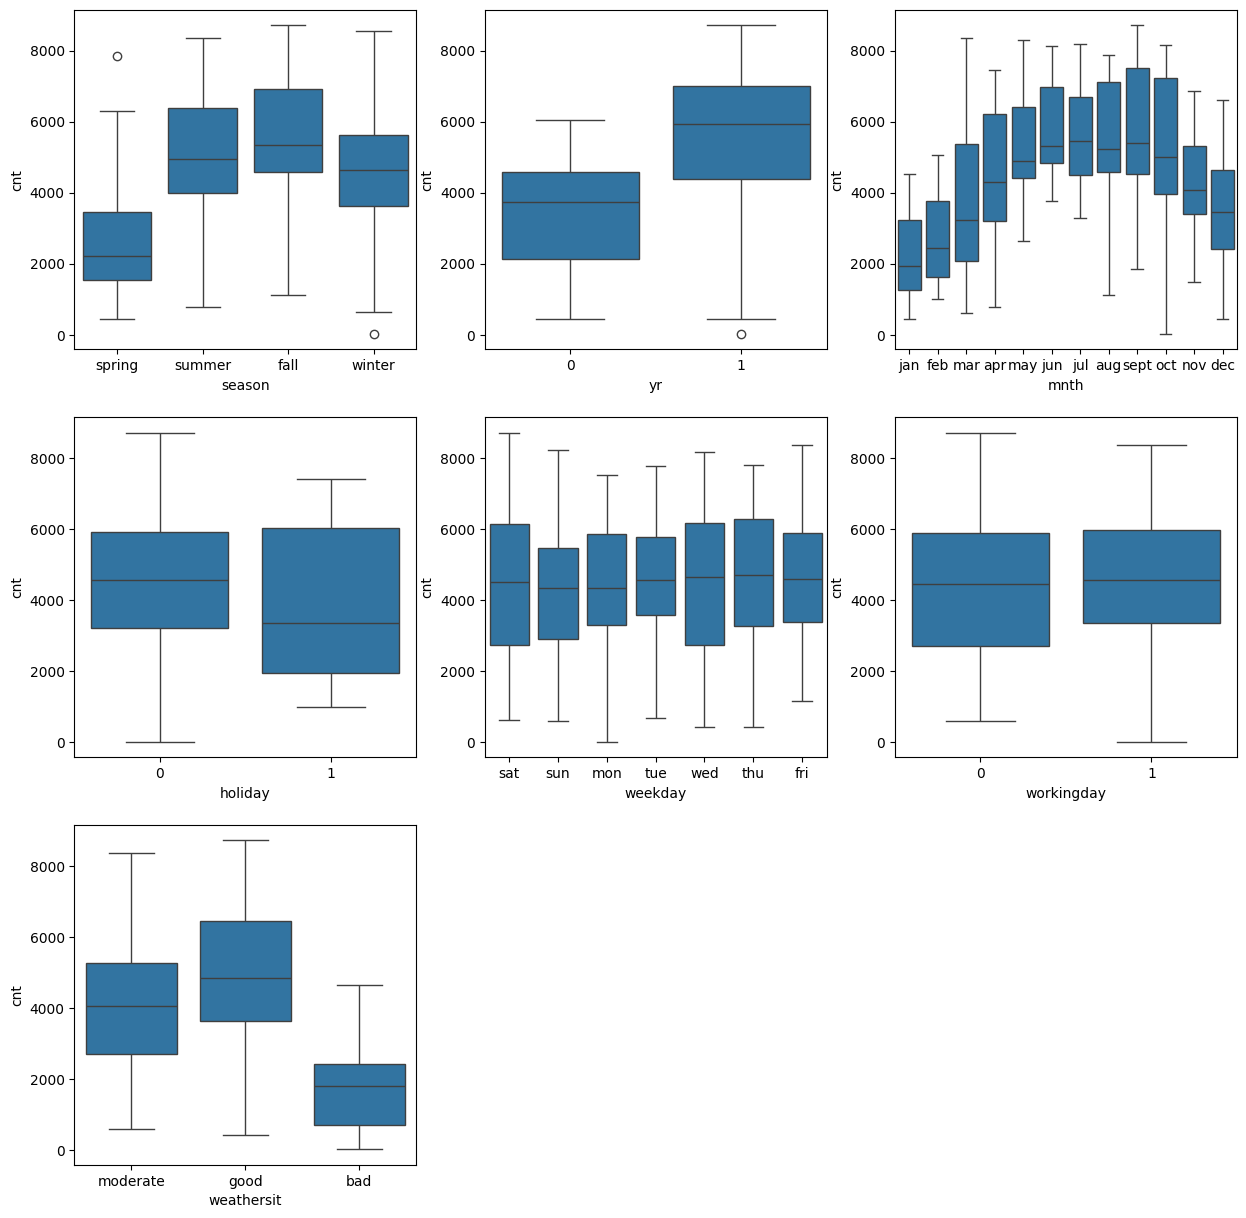

In [84]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=day_df, x=i[1], y='cnt')
plt.show()

##### Weekday is not giving clear picture abount demand.
##### During September, which is fall season bike sharing is more. For 2019 year demand is increasing.
##### Fall season has highest demand for rental bikes
##### On holiday demand decreases. 
##### Good weather increases bike sharing demand.


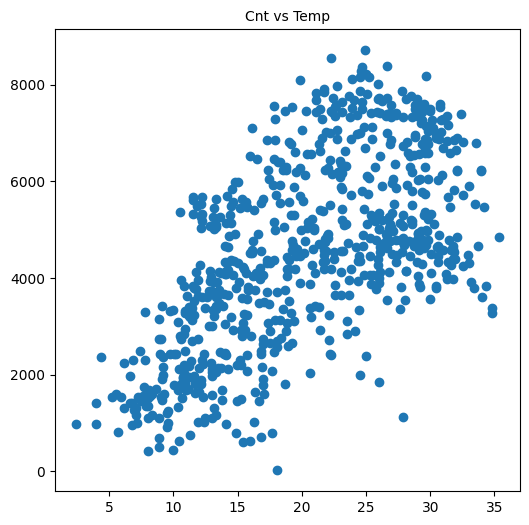

In [85]:
plt.figure(figsize=[6,6])
plt.title("Cnt vs Temp",fontsize=10)
plt.scatter(day_df.temp, day_df.cnt)
plt.show()

#### Temprature is positively correlated with Cnt target variable

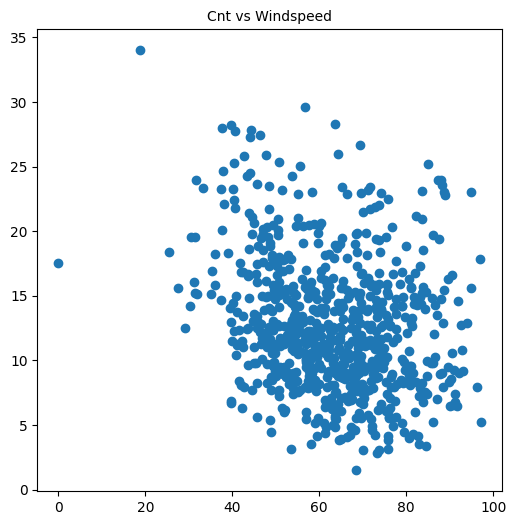

In [86]:
plt.figure(figsize=[6,6])
plt.title("Cnt vs Windspeed",fontsize=10)
plt.scatter(day_df.hum, day_df.windspeed)
plt.show()

#### We can see cnt decreasing with increase in windspeed

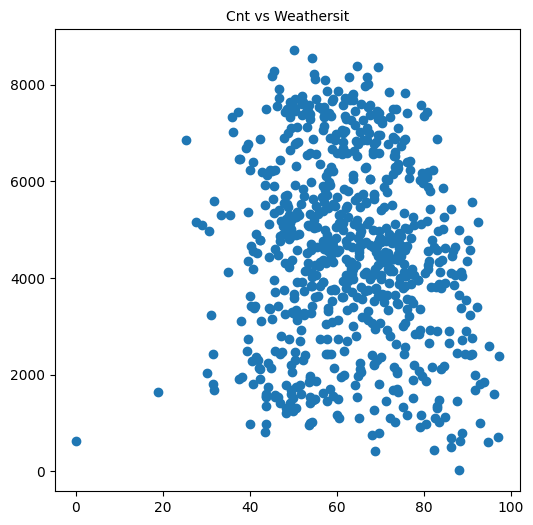

In [87]:
plt.figure(figsize=[6,6])
plt.title("Cnt vs Weathersit",fontsize=10)
plt.scatter(day_df.hum, day_df.cnt)
plt.show()

#### Values of Humidity are more scatterd, seems demand decreases when humidity increases

### Step 5: Create dummy variables for all categorical variables

In [174]:
day_df = pd.get_dummies(data=day_df,columns=["season","mnth","weekday",'weathersit'],drop_first=True,dtype=int)

In [175]:
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [176]:
day_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


### Step 6: Model Building

In [177]:
#y to contain only target variable
y = day_df.pop('cnt')

#X is all remainign variable also our independent variables
X = day_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [178]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [179]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [180]:
X.shape

(730, 28)

In [181]:
X_train.shape

(510, 28)

In [182]:
X_test.shape

(219, 28)

In [183]:
y_train.shape

(510,)

In [184]:
y_test.shape

(219,)

In [185]:
scaler = MinMaxScaler()

In [186]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [188]:

# Apply scaler() to all the columns continous variables
num_vars = ['yr', 'temp','hum','windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [189]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [190]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [192]:
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [193]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 13),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [194]:
#Print Columns selected by RFE. We will start with these columns for manual elimination

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [195]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [197]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_moderate']]

In [198]:
X_train_rfe.shape

(510, 14)

In [199]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [200]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1 Start with all variable selected by RFE (Automated feature selection)

In [205]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.33e-174
Time:                        21:01:27   Log-Likelihood:                -4149.2
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     495   BIC:                             8392.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2767.7948    

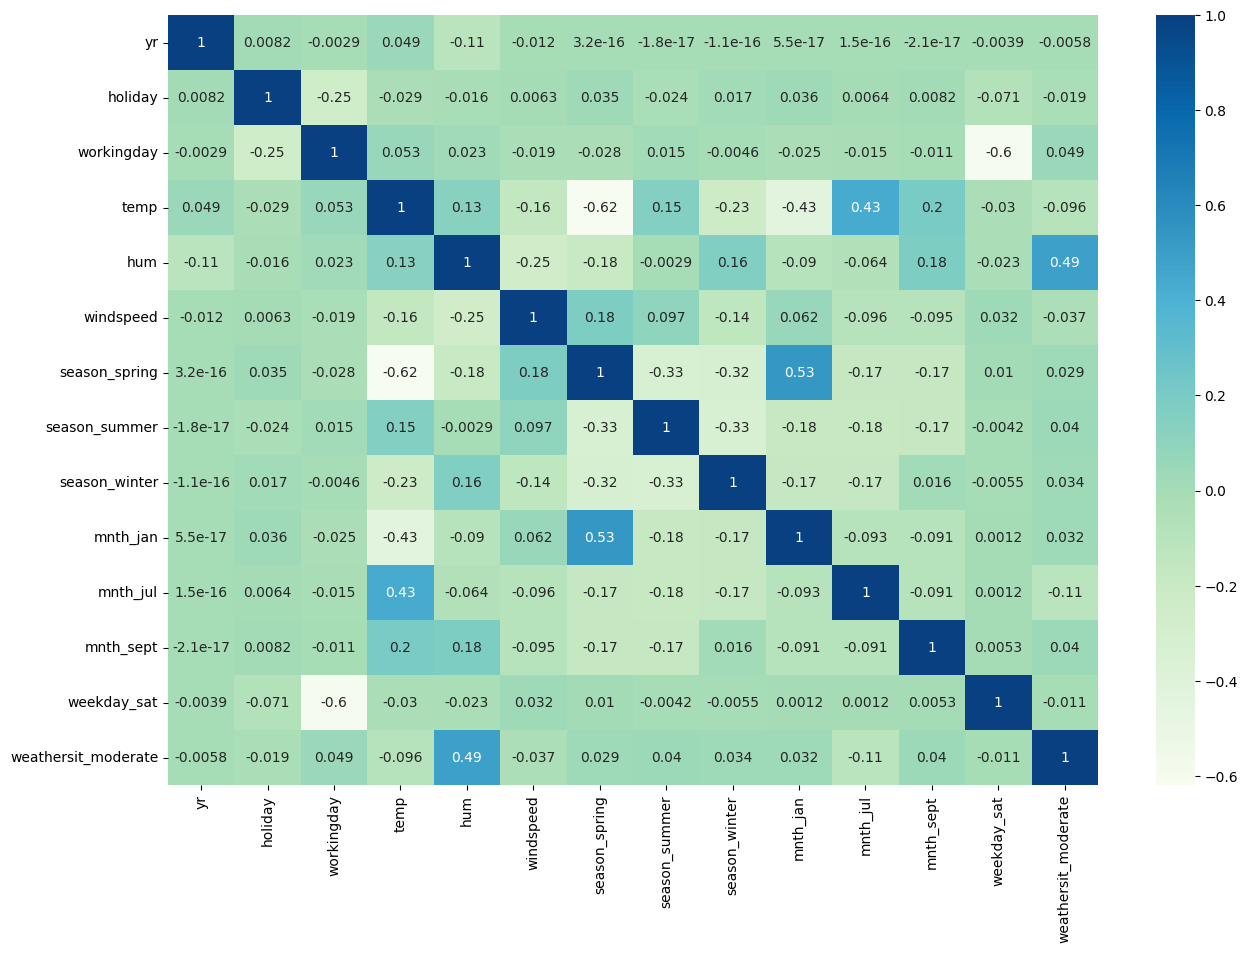

In [210]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(day_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat','weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2 Remove all variable which have negative co-effiecient

In [206]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'workingday', 'temp', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.48e-149
Time:                        21:13:34   Log-Likelihood:                -4228.8
No. Observations:                 510   AIC:                             8474.
Df Residuals:                     502   BIC:                             8507.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -165.7779    159.808     -1.037

#### Model 3 Lets take variable which have less p values and drop variables which have higher negative co-effiecient selected varibale based on univariant analysis.

In [265]:
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept','weekday_sun', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     266.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.41e-175
Time:                        22:01:42   Log-Likelihood:                -4164.5
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     501   BIC:                             8385.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             395.9283    155.061     

#### Based on model 3 I have taken variable which have very low p-value less than 0.05, variance also adjusted which lesser than 5 and R-squared score is more than 80% which is good enough for significant feature selection

#### Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

### Step 7: Model Evaluation

##### Residucal Analysis

In [273]:
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept','weekday_sun', 'weathersit_good']
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lm.predict(X_train_sm)


In [271]:
y_train_pred

653    6303.472542
576    6749.053216
426    4162.069466
728    3044.318030
482    4826.536674
          ...     
526    6606.778515
578    7100.622854
53     2016.838720
350    1970.333637
79     2560.610069
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

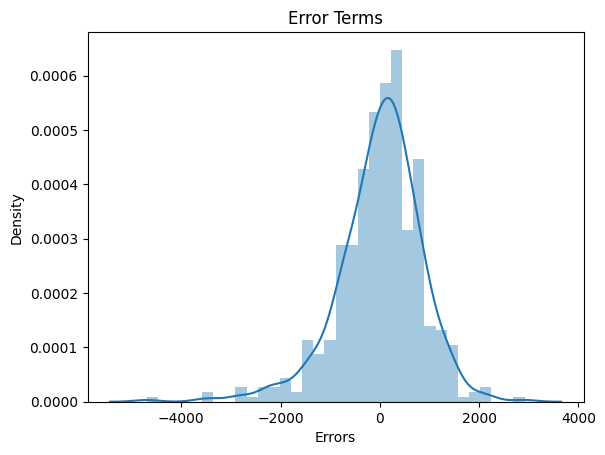

In [277]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

#### Errors are normally distribured here with mean 0. So everything seems to be fine

Text(0, 0.5, 'y_train_pred')

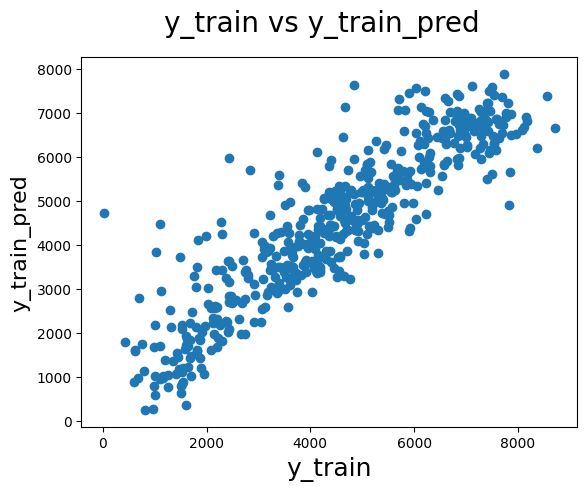

In [278]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

In [279]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.809431893571671

##### Predict values for test data set

In [285]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,63.7917,5.459106,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,81.2917,13.250121,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,30.5000,19.583229,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [287]:
#Scale variables in X_test
num_vars = ['yr','temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [289]:
#Predict the values for test data
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept','weekday_sun', 'weathersit_good']
X_test_sm = sm.add_constant(X_test[cols])
lm = sm.OLS(y_test, X_test_sm).fit()
y_test_pred = lm.predict(X_test_sm)


In [290]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7897476217803128

#### R2 value for predictions on test data (0.80) is almost same as R2 value of train data(0.81). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

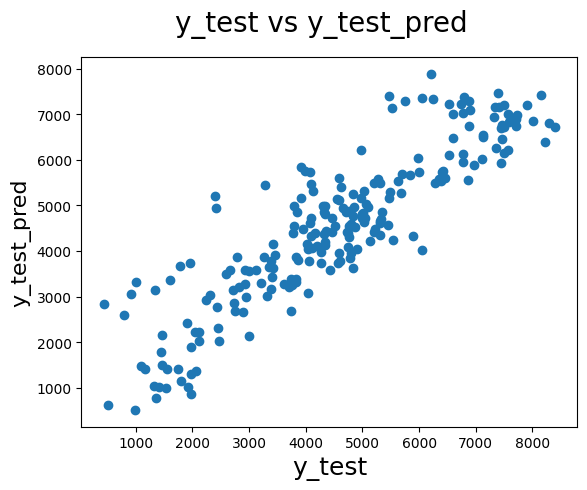

In [291]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### As we can see predictions for test data is very close to actuals

### _`Conclusion`_

Company should focus more on september month in spring season can launch multiple offers to get more engagement when temprature is and weather is pleasant.

Significant variables to predict the demand for shared bikes
- temp
- windspeed
- Season
- weathersit(Clear, Few clouds, Partly cloudy, Partly cloudy)
- year(2019)
- months(September)
- weekday- Sunday